# Analyzing and optimizing a stock portfolio using Python

Analyzing a portfolio of stocks using Python involves leveraging various libraries and techniques to understand the performance, risk, and composition of a collection of stocks. Portfolio optimization using Python involves using mathematical and computational techniques to construct an investment portfolio that aims to maximize returns for a given level of risk or minimize risk for a desired level of return. 

In this analysis, we will look at a portfolio of stocks containing Tech Mahindra, Aurobindo Pharma, TATA Consumer Products and Havells. The stocks have been chosen randomly from the different sectoral NIFTY indices. The stock data for these stocks have been taken from Yahoo finance.

The analysis connsist of two parts: 1) Portfolio Analysis 2) Portfolio Optimization
1. Portfolio Analysis<br>

    1(a). Creating portfolio dataframe.<br>
    1(b). Ploting portfolio trend and volatility over time.<br>
    1(c). Calculating portfolio returns and plotting returns volatility over time.<br>
    1(d). Calculating and plotting Sharpe Ratio over time.<br>
    1(e). Calculating and plotting negative volatility over time.<br>
    1(f). Comparing the portfolio returns with returns of NIFTY 50 (benchmark) and Gold.<br>
       
       
2. Portfolio Optimization<br>
    2(a) Optimizing portfolio allocation using Monte Carlo Simulation.<br>
    2(b) Optimizing portfolio allocation using Mathematical Optimization. <br>

## 1. Portfolio Analysis

#### Importing the required dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the stock data into the dataframe

In [2]:
tech_m = pd.read_csv('TECHM.NS.CSV')
aurobindo = pd.read_csv('AUROPHARMA.NS.CSV')
tata_cons = pd.read_csv('TATACONSUM.NS.CSV')
havells = pd.read_csv('HAVELLS.NS.CSV')

#### Converting the dates in the respective dataframes to datetime objects 

In [3]:
def set_datetime(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe.set_index('Date', inplace = True)

In [4]:
set_datetime(tech_m)
set_datetime(aurobindo)
set_datetime(tata_cons)
set_datetime(havells)

In [5]:
# Looking for null values in tech_m dataframe. Similar process is done for other stock dataframes as well
tech_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2020-11-02 to 2023-10-30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    float64
 1   Adj Close  742 non-null    float64
 2   Volume     742 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 23.2 KB


### 1(a). Creating portfolio dataframe

#### Creating a normalized return column in each dataframe

In [6]:
for stock_df in (tech_m,aurobindo,tata_cons,havells):
    stock_df['Normed return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']
 # Looking at tech_m dataframe as an example

In [7]:
 # Looking at the Normed column in tech_m dataframe as an example
tech_m.head()

,Close,Adj Close,Volume,Normed return
Date,,,,
2020-11-02,814.650024,714.822388,4433983,1.000000
2020-11-03,808.099976,709.074829,4599741,0.991959
2020-11-04,826.849976,725.527283,5017595,1.014976
2020-11-05,840.700012,737.680115,4269675,1.031977
2020-11-06,851.150024,746.849548,4123331,1.044804


Let us assume a hypothetical allocation of 30% in Tech Mahindra, 30% in Aurobindo Pharma, 20% in TATA Consumer Products, 20% in Havells. Later on, we will create an optimum portfolio allocation using monte carlo simulation and sharpe ratio.

#### Attaching the respective allocation to each stock dataframe using the zip function

In [8]:
list(zip((tech_m,aurobindo,tata_cons,havells),[0.3,0.3,0.2,0.2]))

[(                  Close    Adj Close   Volume  Normed return
  Date                                                        
  2020-11-02   814.650024   714.822388  4433983       1.000000
  2020-11-03   808.099976   709.074829  4599741       0.991959
  2020-11-04   826.849976   725.527283  5017595       1.014976
  2020-11-05   840.700012   737.680115  4269675       1.031977
  2020-11-06   851.150024   746.849548  4123331       1.044804
  ...                 ...          ...      ...            ...
  2023-10-23  1155.949951  1143.620972  1203959       1.599867
  2023-10-25  1142.150024  1129.968140  1555285       1.580768
  2023-10-26  1115.449951  1103.552856  7099401       1.543814
  2023-10-27  1120.550049  1108.598633  1382498       1.550873
  2023-10-30  1126.900024  1114.880859  2255915       1.559661
  
  [742 rows x 4 columns],
  0.3),
 (                 Close   Adj Close   Volume  Normed return
  Date                                                      
  2020-11-02  760.9000

In [9]:
# Creating an allocation column in each stock dataframe
for stock,allo in zip((tech_m,aurobindo,tata_cons,havells),[0.3,0.3,0.2,0.2]):
    stock['Allocation'] = stock['Normed return']*allo

In [10]:
tech_m.head()

,Close,Adj Close,Volume,Normed return,Allocation
Date,,,,,
2020-11-02,814.650024,714.822388,4433983,1.000000,0.300000
2020-11-03,808.099976,709.074829,4599741,0.991959,0.297588
2020-11-04,826.849976,725.527283,5017595,1.014976,0.304493
2020-11-05,840.700012,737.680115,4269675,1.031977,0.309593
2020-11-06,851.150024,746.849548,4123331,1.044804,0.313441


A new column called “Allocation” is created in each individual stock dataframe by multiplying the allocation to the normalized return. For example, it can be seen in the tech_m dataframe that a new “Allocation” column is created by multiplying 0.3 (or 30%) with the Normed return.

Suppose, we want to allocate a total of Rs. 1,00,000 to this portfolio. To find the individual position for each stock, we multiply the total amount (in our case, Rs. 1,00,000) by the allocation. This calculation is shown below.

In [11]:
# Creating a new "Position" column
for stock in (tech_m,aurobindo,tata_cons,havells):
    stock['Position'] = stock['Allocation']*100000

In [12]:
# Looking at tech_m, for example
tech_m.head()

,Close,Adj Close,Volume,Normed return,Allocation,Position
Date,,,,,,
2020-11-02,814.650024,714.822388,4433983,1.000000,0.300000,30000.000000
2020-11-03,808.099976,709.074829,4599741,0.991959,0.297588,29758.783758
2020-11-04,826.849976,725.527283,5017595,1.014976,0.304493,30449.268036
2020-11-05,840.700012,737.680115,4269675,1.031977,0.309593,30959.303768
2020-11-06,851.150024,746.849548,4123331,1.044804,0.313441,31344.130816


Having created the allocation in all the individual stock dataframe, let us create our portfolio.

In [13]:
# Creating our portfolio
positions_total = [tech_m['Position'],aurobindo['Position'],tata_cons['Position'],havells['Position']]
portfolio = pd.concat(positions_total, axis = 1, keys = ['TechM','Aurobindo','TATA Consum','Havells'])

In [14]:
portfolio.head()

,TechM,Aurobindo,TATA Consum,Havells
Date,,,,
2020-11-02,30000.000000,30000.000000,20000.000000,20000.000000
2020-11-03,29758.783758,30344.983829,19827.848118,20043.501800
2020-11-04,30449.268036,30822.047948,19959.493733,20676.816887
2020-11-05,30959.303768,31196.607684,20514.431902,20927.584553
2020-11-06,31344.130816,30758.969823,20423.291308,20948.057841


In [15]:
# Creating a total position column
portfolio['Total'] = portfolio.sum(axis=1)
portfolio.head()

,TechM,Aurobindo,TATA Consum,Havells,Total
Date,,,,,
2020-11-02,30000.000000,30000.000000,20000.000000,20000.000000,100000.000000
2020-11-03,29758.783758,30344.983829,19827.848118,20043.501800,99975.117505
2020-11-04,30449.268036,30822.047948,19959.493733,20676.816887,101907.626604
2020-11-05,30959.303768,31196.607684,20514.431902,20927.584553,103597.927906
2020-11-06,31344.130816,30758.969823,20423.291308,20948.057841,103474.449787


### 1(b). Ploting portfolio trend and volatility over time.

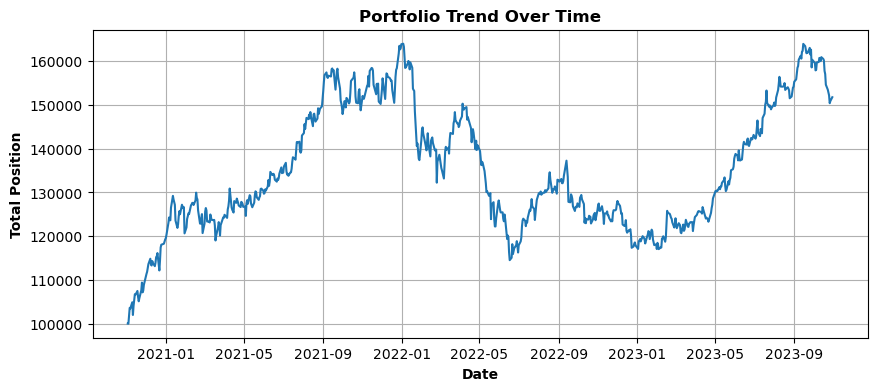

In [16]:
plt.figure(figsize=(10,4))
plt.plot(portfolio['Total'])
plt.title('Portfolio Trend Over Time',fontweight='bold')
plt.ylabel('Total Position',fontweight='bold')
plt.xlabel('Date',fontweight='bold')        
plt.grid(True)

In [17]:
price_volatility = portfolio['Total'].rolling(window=15).std().dropna()
price_volatility.head()

Date
2020-11-20    2370.147251
2020-11-23    2212.681879
2020-11-24    2102.090615
2020-11-25    1916.890397
2020-11-26    1879.179328
Name: Total, dtype: float64

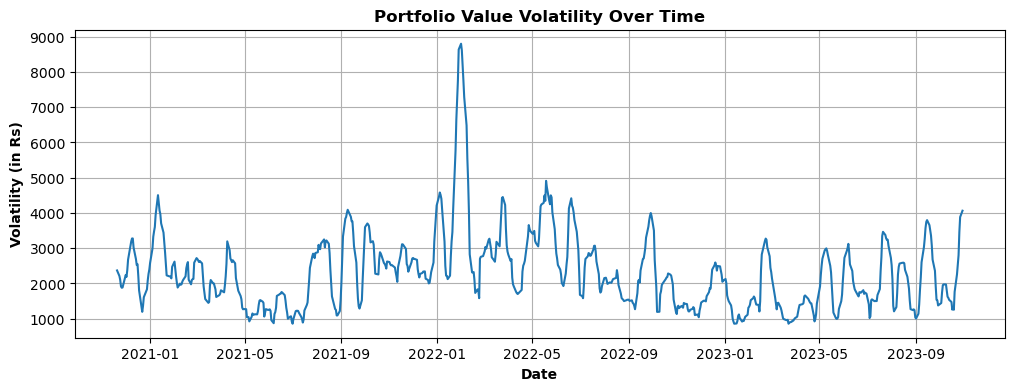

In [18]:
plt.figure(figsize=(12,4))
plt.plot(price_volatility)
plt.title('Portfolio Value Volatility Over Time',fontweight='bold')
plt.ylabel('Volatility (in Rs)',fontweight='bold')
plt.xlabel('Date',fontweight='bold')        
plt.grid(True)

### 1(c). Calculating portfolio returns and plotting returns volatility over time.

In [19]:
portfolio['Daily Returns'] = portfolio['Total'].pct_change(1)
portfolio.head()

,TechM,Aurobindo,TATA Consum,Havells,Total,Daily Returns
Date,,,,,,
2020-11-02,30000.000000,30000.000000,20000.000000,20000.000000,100000.000000,NaN
2020-11-03,29758.783758,30344.983829,19827.848118,20043.501800,99975.117505,-0.000249
2020-11-04,30449.268036,30822.047948,19959.493733,20676.816887,101907.626604,0.019330
2020-11-05,30959.303768,31196.607684,20514.431902,20927.584553,103597.927906,0.016587
2020-11-06,31344.130816,30758.969823,20423.291308,20948.057841,103474.449787,-0.001192


In [20]:
returns_volatility = (portfolio['Daily Returns'][1:].rolling(window=15).std().dropna())*(15**0.5)
returns_volatility.head(5)

Date
2020-11-23    0.053007
2020-11-24    0.053877
2020-11-25    0.057937
2020-11-26    0.056216
2020-11-27    0.056873
Name: Daily Returns, dtype: float64

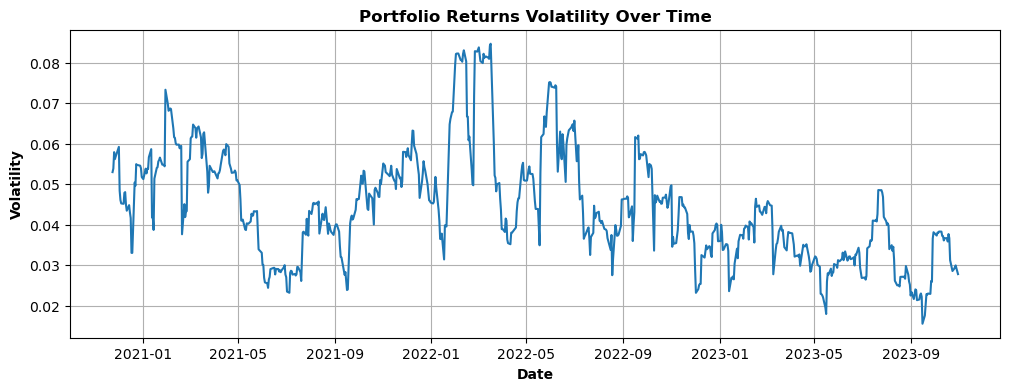

In [21]:
plt.figure(figsize=(12,4))
plt.plot(returns_volatility)
plt.title('Portfolio Returns Volatility Over Time',fontweight='bold')
plt.ylabel('Volatility',fontweight='bold')
plt.xlabel('Date',fontweight='bold')        
plt.grid(True)

### 1(d). Calculating and plotting Sharpe Ratio over time.

In [22]:
# Assuming 7.2% risk free rate taken from 10 year Indian government bond
Rf = 0.072/252 
sharpe_ratio = (portfolio['Daily Returns'][1:].rolling(window=15).mean().dropna() - Rf)*15/returns_volatility

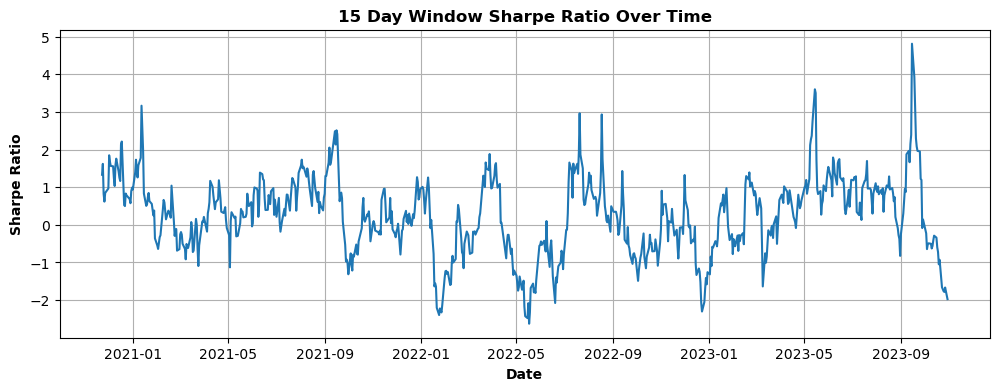

In [23]:
plt.figure(figsize=(12,4))
plt.plot(sharpe_ratio)
plt.title('15 Day Window Sharpe Ratio Over Time',fontweight='bold')
plt.ylabel('Sharpe Ratio',fontweight='bold')
plt.xlabel('Date',fontweight='bold')        
plt.grid(True)

### 1(e). Calculating and plotting negative volatility over time.

In [24]:
negative_volatility = (portfolio[portfolio['Daily Returns'] < 0]['Daily Returns'].rolling(window=15).std().dropna())*(15**0.5)
negative_volatility.head()

Date
2021-01-12    0.040356
2021-01-13    0.039553
2021-01-14    0.038832
2021-01-15    0.039137
2021-01-18    0.038016
Name: Daily Returns, dtype: float64

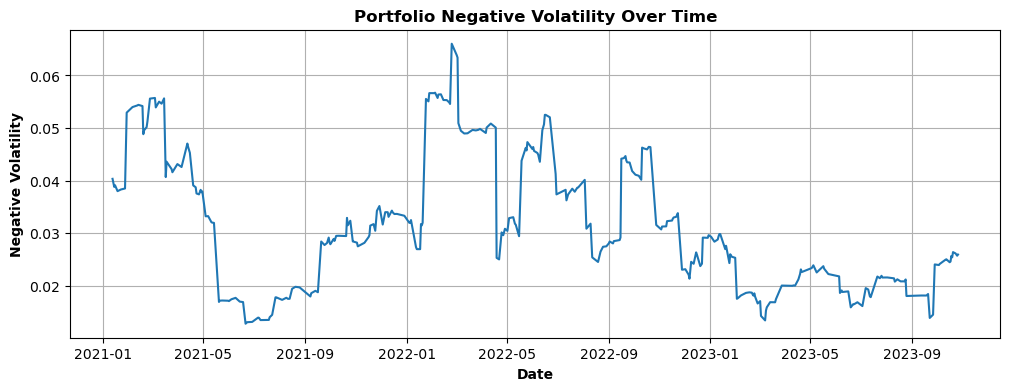

In [25]:
plt.figure(figsize=(12,4))
plt.plot(negative_volatility)
plt.title('Portfolio Negative Volatility Over Time',fontweight='bold')
plt.ylabel('Negative Volatility',fontweight='bold')
plt.xlabel('Date',fontweight='bold')        
plt.grid(True)

### 1(f). Comparing the portfolio returns with returns of NIFTY 50 (benchmark) and Gold.

In [26]:
nifty50 = pd.read_csv('^NSEI.csv')
gold = pd.read_csv('GOLDBEES.NS.csv')

In [27]:
nifty50['Date'] = pd.to_datetime(nifty50['Date'])
nifty50.set_index('Date', inplace = True)
gold['Date'] = pd.to_datetime(gold['Date'])
gold.set_index('Date', inplace = True)

In [28]:
nifty50['Daily Returns'] = nifty50['Close'].pct_change()
gold['Daily Returns'] = gold['Close'].pct_change()

Comparing the portfolio returns with NIFTY 50

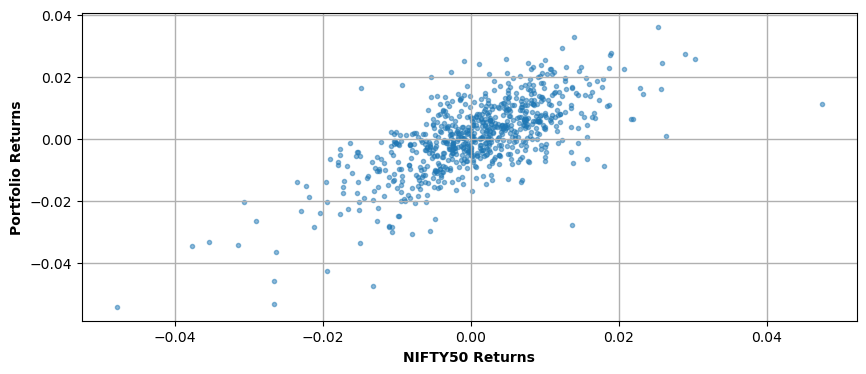

In [29]:
plt.figure(figsize = (10,4))
plt.scatter(nifty50['Daily Returns'],portfolio['Daily Returns'], marker ='.', alpha = 0.5)
plt.xlabel('NIFTY50 Returns', fontweight = 'bold')
plt.ylabel('Portfolio Returns',fontweight = 'bold')
plt.grid(True,lw=1)

In [30]:
from scipy import stats

In [31]:
regress_result = stats.linregress(nifty50.iloc[1:]['Daily Returns'],portfolio.iloc[1:]['Daily Returns'])
regress_result

LinregressResult(slope=0.8833249753068815, intercept=5.690550522377612e-06, rvalue=0.6937597352774579, pvalue=1.9337081547725842e-107, stderr=0.03373232284728827, intercept_stderr=0.00031660981228683114)

In [32]:
# Slope and correlation coefficient
regress_result.slope,regress_result.rvalue

(0.8833249753068815, 0.6937597352774579)

In [33]:
r_squared_1 = regress_result.rvalue**2
r_squared_1

0.4813025702922485

Comparing the portfolio returns with Gold

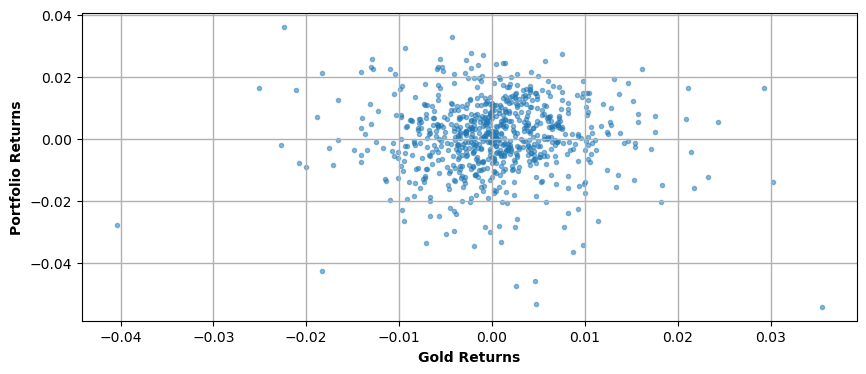

In [34]:
plt.figure(figsize = (10,4))
plt.scatter(gold['Daily Returns'],portfolio['Daily Returns'], marker ='.', alpha = 0.5)
plt.xlabel('Gold Returns', fontweight = 'bold')
plt.ylabel('Portfolio Returns',fontweight = 'bold')
plt.grid(True,lw=1)

In [35]:
regress_result2 = stats.linregress(gold.iloc[1:]['Daily Returns'],portfolio.iloc[1:]['Daily Returns'])
regress_result2 

LinregressResult(slope=-0.01909737282409199, intercept=0.0006390249995406124, rvalue=-0.011610778231865505, pvalue=0.7523534240711596, stderr=0.06050075603239435, intercept_stderr=0.00043854099543845764)

In [36]:
regress_result2.slope, regress_result2.rvalue

(-0.01909737282409199, -0.011610778231865505)

In [37]:
r_squared_2 = regress_result2.rvalue**2
r_squared_2

0.00013481017114956185

## 2. Portfolio Optimization

#### Creating the logarithmic returns dataframe

In [38]:
returns = pd.DataFrame()
returns['TechM Returns'] = np.log(tech_m['Adj Close']/tech_m['Adj Close'].shift(1))
returns['Aurobindo Returns'] = np.log(aurobindo['Adj Close']/aurobindo['Adj Close'].shift(1))
returns['TATA Consum Returns'] = np.log(tata_cons['Adj Close']/tata_cons['Adj Close'].shift(1))
returns['Havells Returns'] = np.log(havells['Adj Close']/havells['Adj Close'].shift(1))


In [39]:
log_returns = returns.dropna()

In [40]:
log_returns.head()

,TechM Returns,Aurobindo Returns,TATA Consum Returns,Havells Returns
Date,,,,
2020-11-03,-0.008073,0.011434,-0.008645,0.002173
2020-11-04,0.022938,0.015599,0.006617,0.031108
2020-11-05,0.016612,0.012079,0.027424,0.012055
2020-11-06,0.012353,-0.014128,-0.004453,0.000978
2020-11-09,0.025061,0.008234,0.011144,0.006514


In [41]:
log_returns.mean()*250

TechM Returns          0.149956
Aurobindo Returns      0.050126
TATA Consum Returns    0.208475
Havells Returns        0.169777
dtype: float64

In [42]:
log_returns.cov()*250

,TechM Returns,Aurobindo Returns,TATA Consum Returns,Havells Returns
TechM Returns,0.080956,0.022804,0.020964,0.020087
Aurobindo Returns,0.022804,0.094924,0.018568,0.016037
TATA Consum Returns,0.020964,0.018568,0.055034,0.021512
Havells Returns,0.020087,0.016037,0.021512,0.084009


### 2(a) Optimizing portfolio allocation using Monte Carlo Simulation.

In [43]:
np.random.seed(101)
num_portfolio = 5000 
all_weights = np.zeros((num_portfolio, len(log_returns.columns.tolist())))
return_arr = np.zeros(num_portfolio)
volatility_arr = np.zeros(num_portfolio)
sharpe_arr = np.zeros(num_portfolio)

for i in range(num_portfolio):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[i,:] = weights
    # Expected return
    return_arr[i] = np.sum(returns.mean()*250*weights)
    # Expected Volatility
    volatility_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights)))
    # Sharpe ratio
    sharpe_arr[i] = (return_arr[i] - 0.072)/volatility_arr[i]

In [44]:
sharpe_arr.max()

0.6019236481163419

In [45]:
sharpe_arr.argmax()

2373

In [46]:
all_weights[2373,:]

array([0.04032911, 0.00247757, 0.68534651, 0.27184681])

**Plotting the Return-Volatility graph**

In [47]:
return_sharpe_max = return_arr[2373]
volatility_sharpe_max = volatility_arr[2373]

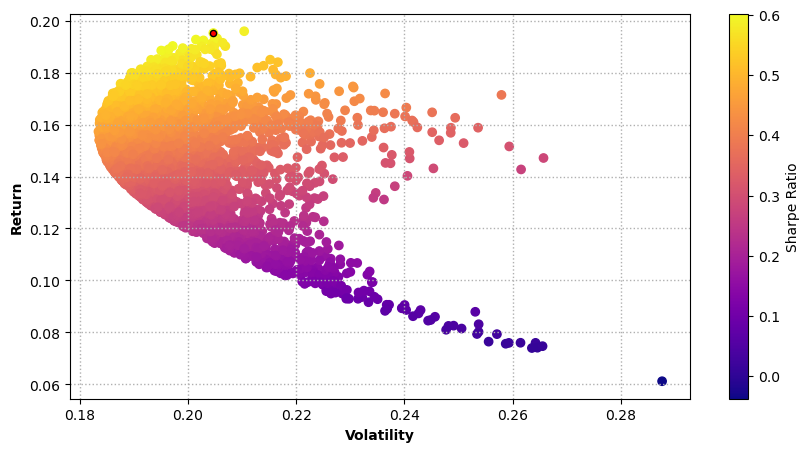

In [48]:
plt.figure(figsize = (10,5))
plt.scatter(volatility_arr,return_arr, c=sharpe_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility',fontweight = 'bold')
plt.ylabel('Return',fontweight = 'bold')

plt.scatter(volatility_sharpe_max,return_sharpe_max, c = 'red', s=20, edgecolors='black')
plt.grid(True,ls=':',lw=1)

### 2(b) Optimizing portfolio allocation using Mathematical Optimization.

We will optimize the same portfolio allocation mathematically using the minimize function in Scipy and Sharpe ratio. The basic principle is to find the Sharpe ratio for a random allocation and then multiply it by -1 to make it negative and then minimize it to obtain the allocation weights that gives the highest Sharpe ratio.

**Defining a function that calculates returns, volatility and Sharpe Ratio**

In [49]:
def return_volatility_sharpe(weights):
    weights = np.array(weights)
    ret = np.sum(log_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sr = (ret - 0.075)/vol
    return np.array([ret,vol,sr])

In [50]:
from scipy.optimize import minimize

**Calculating negative Sharpe Ratio**

In [51]:

def sharpe_neg(weights):
    return  return_volatility_sharpe(weights)[2] * (-1)

In [52]:
def sum_check(weights):
    return np.sum(weights) - 1

In [53]:
# Defining constraints that check the sum of weights
constraint = ({'type':'eq','fun': sum_check})

In [54]:
# Defining bounds for the weights between 0 and 1
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [55]:
# Defining first guess for the allocation
first_guess = [0.25,0.25,0.25,0.25]

In [56]:
# Running the optimization
optimization_results = minimize(sharpe_neg,first_guess,method='SLSQP',bounds=bounds,constraints=constraint)

In [57]:
# Results for the optimization
optimization_results

     fun: -0.5985732654247887
     jac: array([-0.36491092,  0.01803294, -0.36497276, -0.36496189])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.08562056, 0.        , 0.73272344, 0.181656  ])

In [58]:
# Getting the optimized allocations for the stocks
optimization_results.x

array([0.08562056, 0.        , 0.73272344, 0.181656  ])

In [59]:
# Finding returns, volatility and Sharpe Ratio for the optimized allocation
return_volatility_sharpe(optimization_results.x)

array([0.19800614, 0.20549888, 0.59857327])